<p style="text-align: center; font-size: 28px;"><b>Tennis Ace</b></p>

summary

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# “Game, Set, Match!”

No three words are sweeter to hear as a tennis player than those, which indicate that a player has beaten their opponent. While you can head down to your nearest court and aim to overcome your challenger across the net without much practice, a league of professionals spends day and night, month after month practicing to be among the best in the world. Today you will put your linear regression knowledge to the test to better understand what it takes to be an all-star tennis player.

Provided in tennis_stats.csv is data from the men’s professional tennis league, which is called the ATP (Association of Tennis Professionals). Data from the top 1500 ranked players in the ATP over the span of 2009 to 2017 are provided in file. The statistics recorded for each player in each year include service game (offensive) statistics, return game (defensive) statistics and outcomes. Load the csv into a DataFrame and investigate it to gain familiarity with the data.

Open the hint for more information about each column of the dataset.

In [2]:
# load and investigate the data here:
df = pd.read_csv("data_folder/tennis_status.csv")

In [3]:
# Explore the Dataset
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [ ]:
df.columns

ATP Men’s Tennis Dataset

The ATP men’s tennis dataset includes a wide array of tennis statistics, which are described below:

- **Identifying Data**
  - Player: name of the tennis player  
  - Year: year data was recorded  

- **Service Game Columns (Offensive)**
  - Aces: number of serves by the player where the receiver does not touch the ball  
  - DoubleFaults: number of times player missed both first and second serve attempts  
  - FirstServe: % of first-serve attempts made  
  - FirstServePointsWon: % of first-serve attempt points won by the player  
  - SecondServePointsWon: % of second-serve attempt points won by the player  
  - BreakPointsFaced: number of times where the receiver could have won the service game of the player  
  - BreakPointsSaved: % of the time the player was able to stop the receiver from winning the service game when they had the chance  
  - ServiceGamesPlayed: total number of games where the player served  
  - ServiceGamesWon: total number of games where the player served and won  
  - TotalServicePointsWon: % of points in games where the player served that they won  

- **Return Game Columns (Defensive)**
  - FirstServeReturnPointsWon: % of opponent’s first-serve points the player was able to win  
  - SecondServeReturnPointsWon: % of opponent’s second-serve points the player was able to win  
  - BreakPointsOpportunities: number of times where the player could have won the service game of the opponent  
  - BreakPointsConverted: % of the time the player was able to win their opponent’s service game when they had the chance  
  - ReturnGamesPlayed: total number of games where the player’s opponent served  
  - ReturnGamesWon: total number of games where the player’s opponent served and the player won  
  - ReturnPointsWon: total number of points where the player’s opponent served and the player won  
  - TotalPointsWon: % of points won by the player  

- **Outcomes**
  - Wins: number of matches won in a year  
  - Losses: number of matches lost in a year  
  - Winnings: total winnings in USD($) in a year  
  - Ranking: ranking at the end of year  


# EDA 
Perform exploratory analysis on the data by plotting different features against the different outcomes. What relationships do you find between the features and outcomes? Do any of the features seem to predict the outcomes?# 

In [4]:
# Define outcomes
outcomes = ["Wins", "Losses", "Winnings", "Ranking"]

# Define offensive and defensive features to plot
offensive_features = ["Aces", "DoubleFaults"]
defensive_features = ["FirstServeReturnPointsWon", "BreakPointsConverted"]

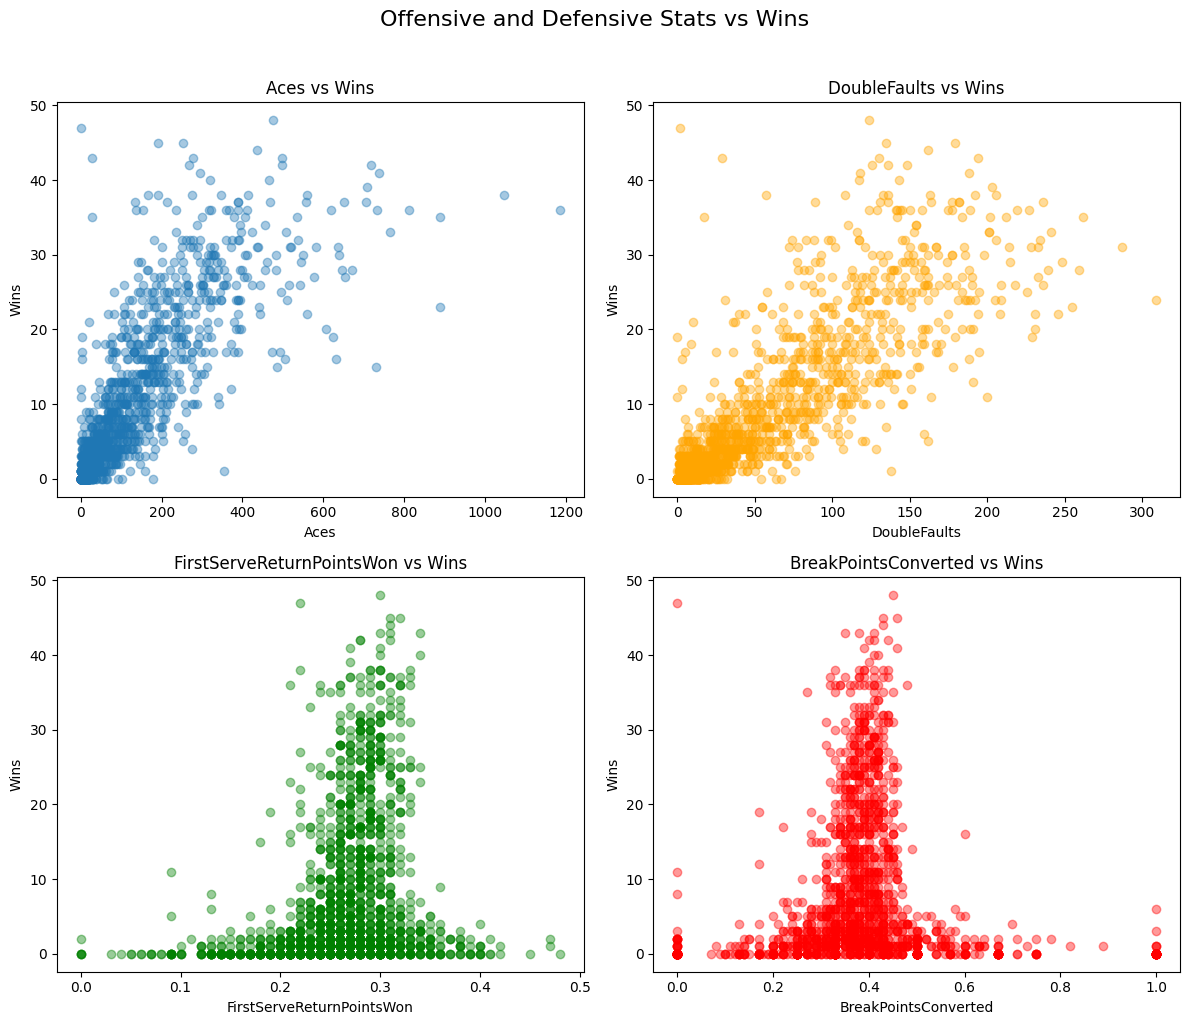

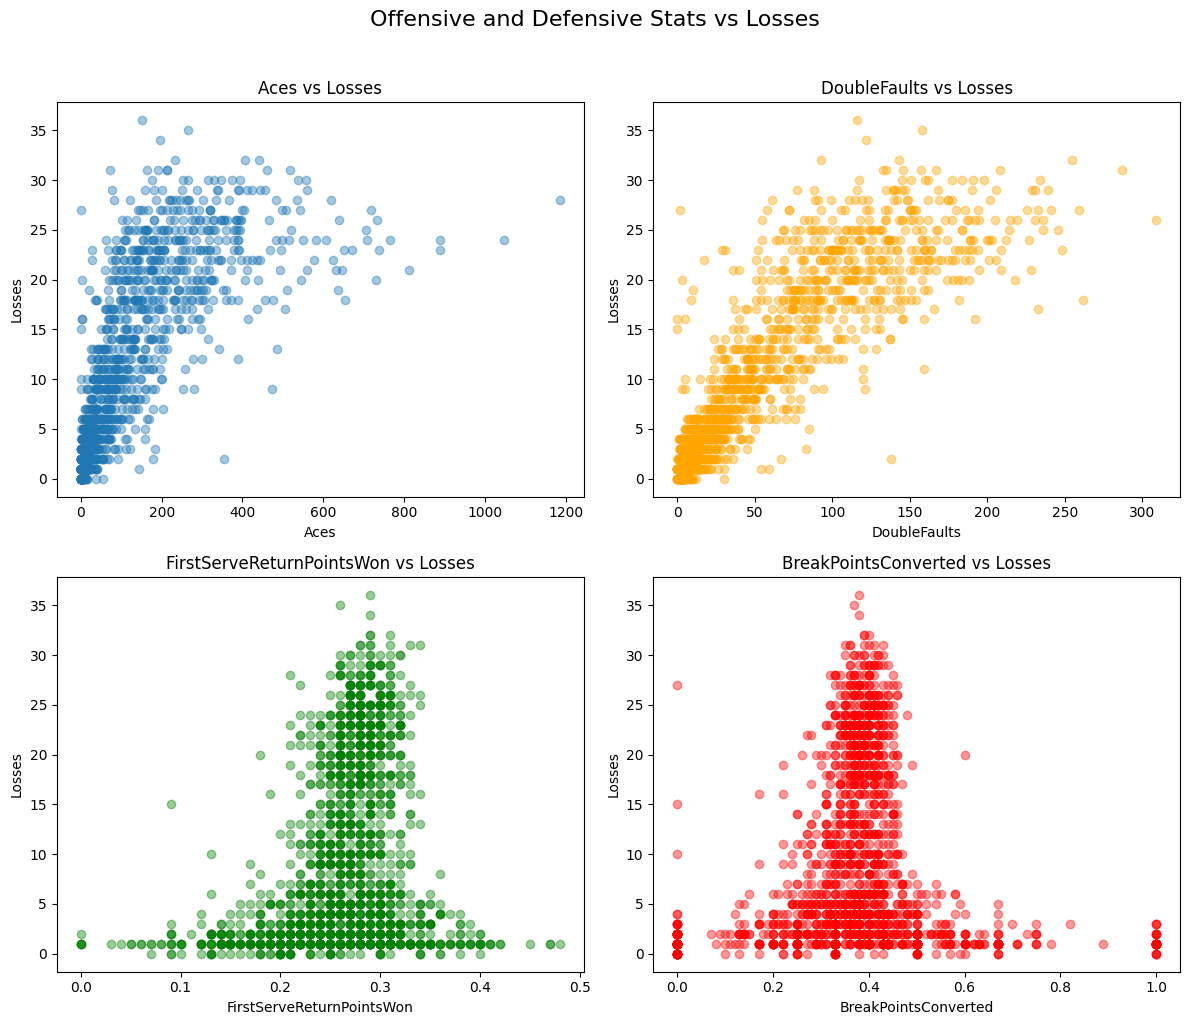

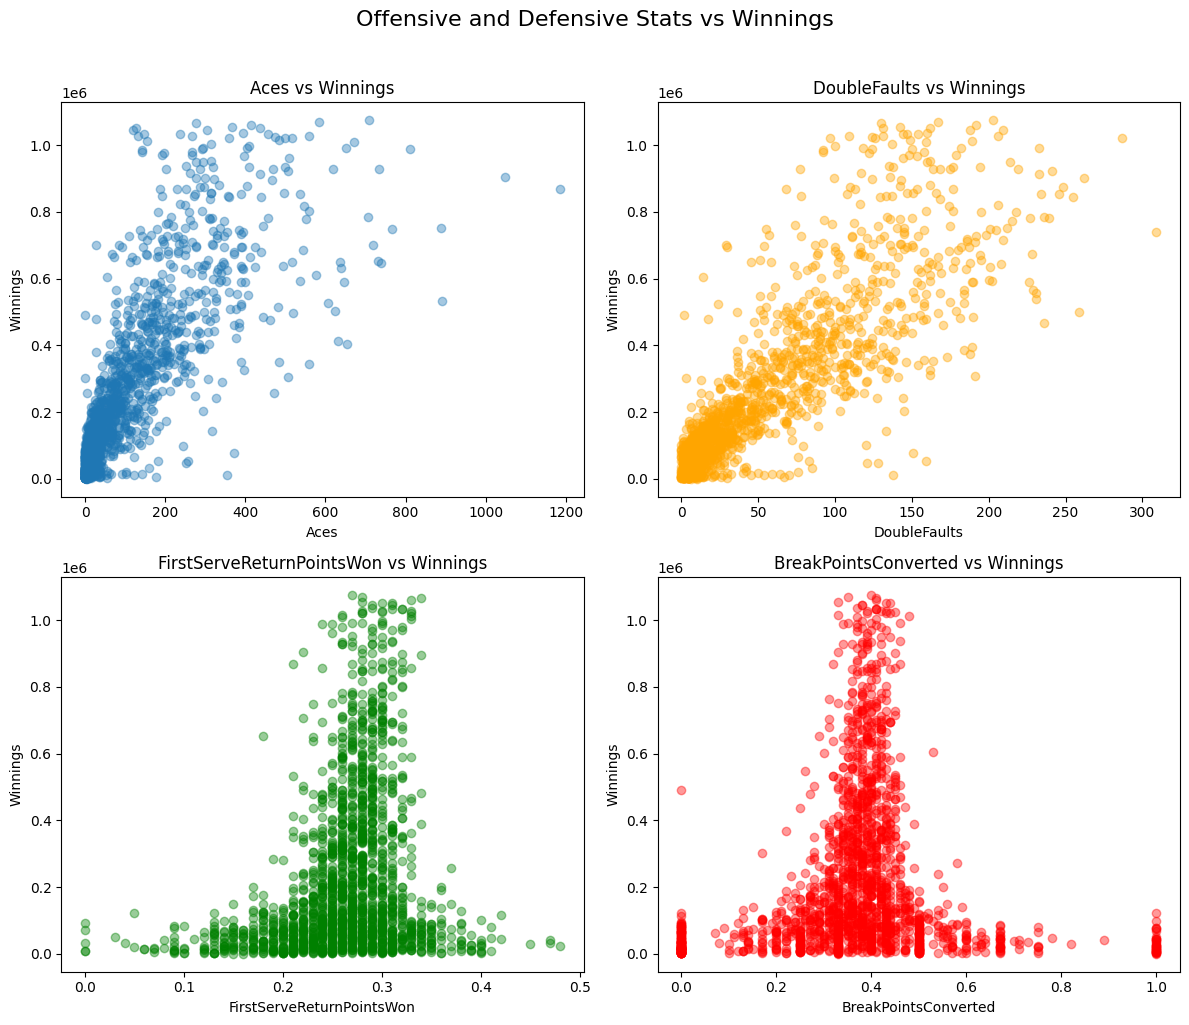

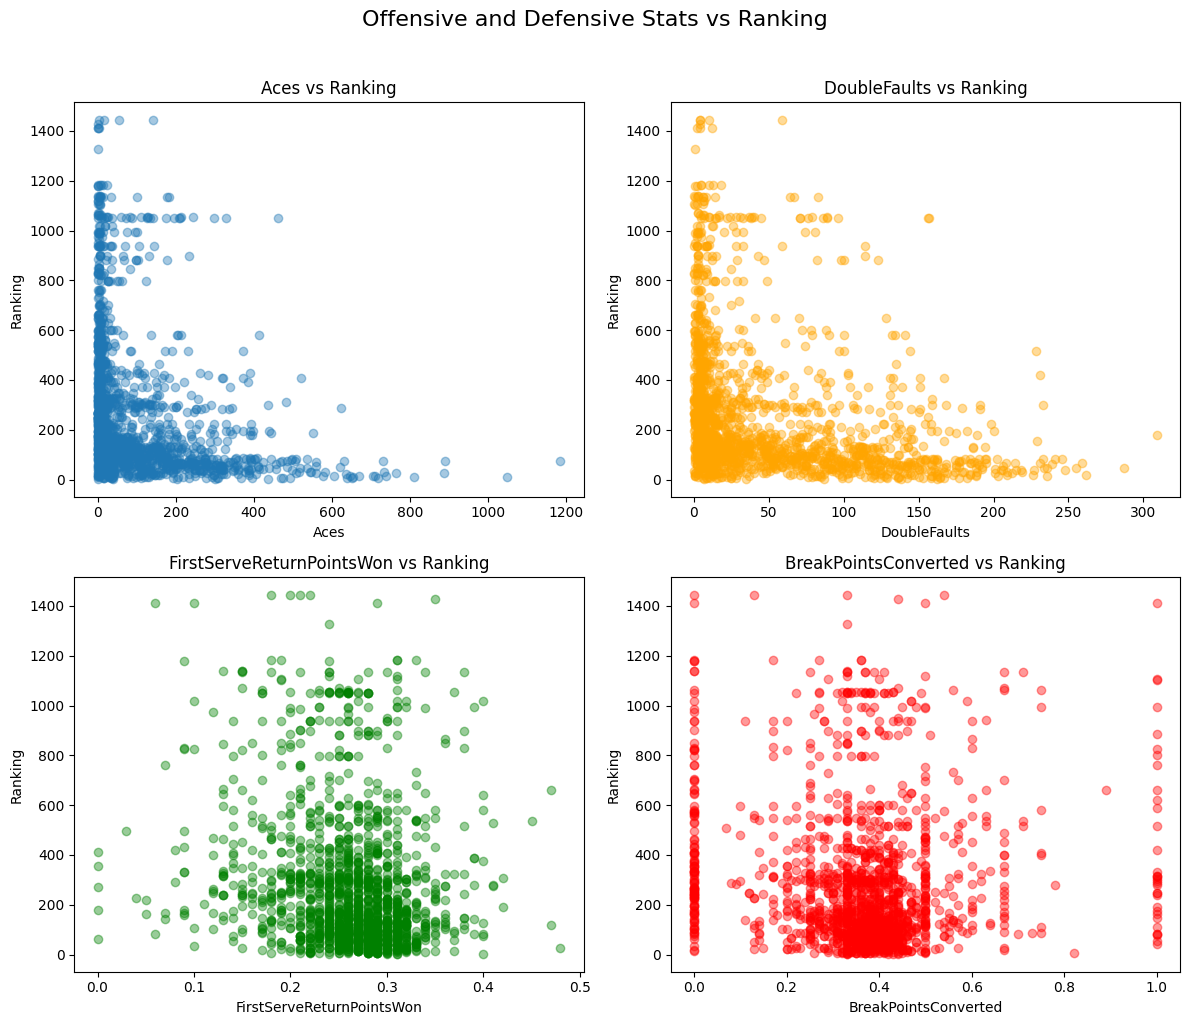

In [5]:
# Loop through outcomes and create 2x2 subplot for each
for outcome in outcomes:
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(f"Offensive and Defensive Stats vs {outcome}", fontsize=16, y=1.02)
    
    # Offensive 1
    axes[0, 0].scatter(df[offensive_features[0]], df[outcome], alpha=0.4)
    axes[0, 0].set_xlabel(offensive_features[0])
    axes[0, 0].set_ylabel(outcome)
    axes[0, 0].set_title(f"{offensive_features[0]} vs {outcome}")
    
    # Offensive 2
    axes[0, 1].scatter(df[offensive_features[1]], df[outcome], alpha=0.4, color="orange")
    axes[0, 1].set_xlabel(offensive_features[1])
    axes[0, 1].set_ylabel(outcome)
    axes[0, 1].set_title(f"{offensive_features[1]} vs {outcome}")
    
    # Defensive 1
    axes[1, 0].scatter(df[defensive_features[0]], df[outcome], alpha=0.4, color="green")
    axes[1, 0].set_xlabel(defensive_features[0])
    axes[1, 0].set_ylabel(outcome)
    axes[1, 0].set_title(f"{defensive_features[0]} vs {outcome}")
    
    # Defensive 2
    axes[1, 1].scatter(df[defensive_features[1]], df[outcome], alpha=0.4, color="red")
    axes[1, 1].set_xlabel(defensive_features[1])
    axes[1, 1].set_ylabel(outcome)
    axes[1, 1].set_title(f"{defensive_features[1]} vs {outcome}")
    
    plt.tight_layout()
    plt.show()

# Simple Linear Regression
Use one feature from the dataset to build a single feature linear regression model on the data. Your model, at this point, should use only one feature and predict one of the outcome columns. Before training the model, split your data into training and test datasets so that you can evaluate your model on the test set. How does your model perform? Plot your model’s predictions on the test set against the actual outcome variable to visualize the performance.

Training R²: 0.6912191972423762
Testing R²: 0.6237030314907435


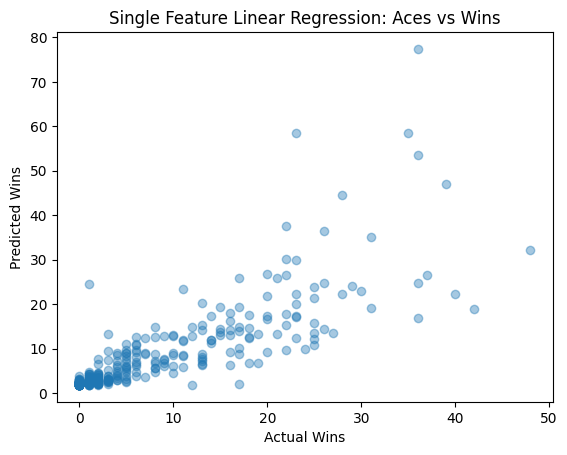

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv("data_folder/tennis_status.csv")

# Choose one feature and one outcome
X = df[["Aces"]]      # single feature
y = df[["Wins"]]      # outcome variable

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

# Create and train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluate R² on training and test sets using .score()
print("Training R²:", lr.score(X_train, y_train))
print("Testing R²:", lr.score(X_test, y_test))

# Plot actual vs predicted values on test set
y_pred = lr.predict(X_test)
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Wins")
plt.ylabel("Predicted Wins")
plt.title("Single Feature Linear Regression: Aces vs Wins")
plt.show()


# More SingleLinear Regressions

Create a few more linear regression models that use one feature to predict one of the outcomes. Which model that you create is the best?

Model: Aces → Wins
  Training R²: 0.6912
  Testing  R²: 0.6237



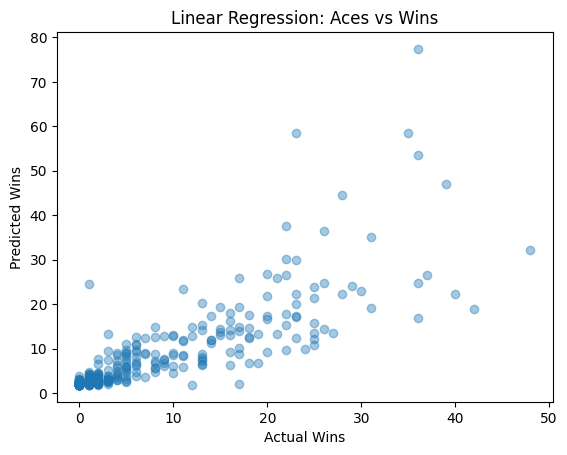

Model: DoubleFaults → Losses
  Training R²: 0.7745
  Testing  R²: 0.7908



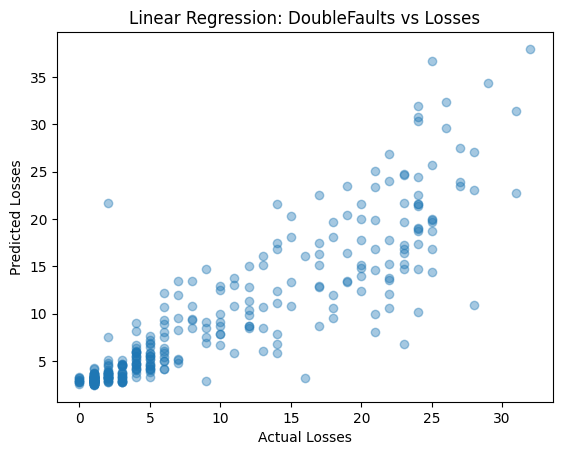

Model: FirstServePointsWon → Winnings
  Training R²: 0.1272
  Testing  R²: 0.1424



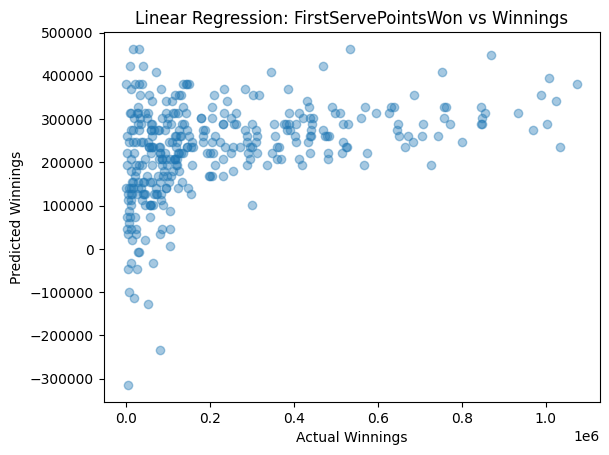

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv("data_folder/tennis_status.csv")

# Define different (feature, outcome) pairs
models = [
    ("Aces", "Wins"),
    ("DoubleFaults", "Losses"),
    ("FirstServePointsWon", "Winnings")
]

# Train and evaluate each single-feature model
for feature, outcome in models:
    X = df[[feature]]
    y = df[[outcome]]
    
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)
    
    # Create and fit model
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    # R² scores
    train_score = lr.score(X_train, y_train)
    test_score = lr.score(X_test, y_test)
    
    print(f"Model: {feature} → {outcome}")
    print(f"  Training R²: {train_score:.4f}")
    print(f"  Testing  R²: {test_score:.4f}\n")
    
    # Plot actual vs predicted
    y_pred = lr.predict(X_test)
    plt.scatter(y_test, y_pred, alpha=0.4)
    plt.xlabel(f"Actual {outcome}")
    plt.ylabel(f"Predicted {outcome}")
    plt.title(f"Linear Regression: {feature} vs {outcome}")
    plt.show()


# Linear Regression with 2 features

Create a few linear regression models that use two features to predict yearly earnings. Which set of two features results in the best model?

Model: ['Aces', 'FirstServePointsWon'] → Winnings
  Training R²: 0.6461
  Testing  R²: 0.5925



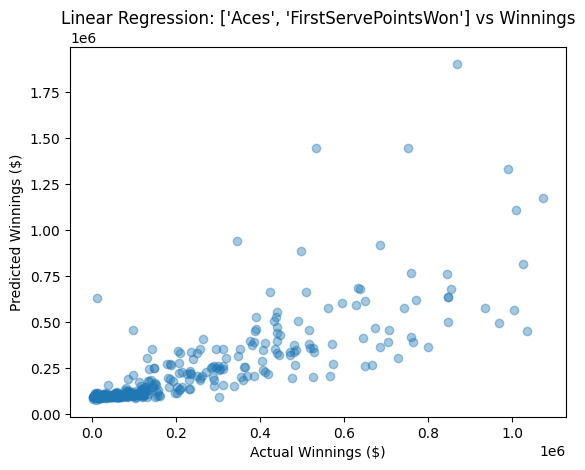

Model: ['DoubleFaults', 'SecondServePointsWon'] → Winnings
  Training R²: 0.7346
  Testing  R²: 0.7477



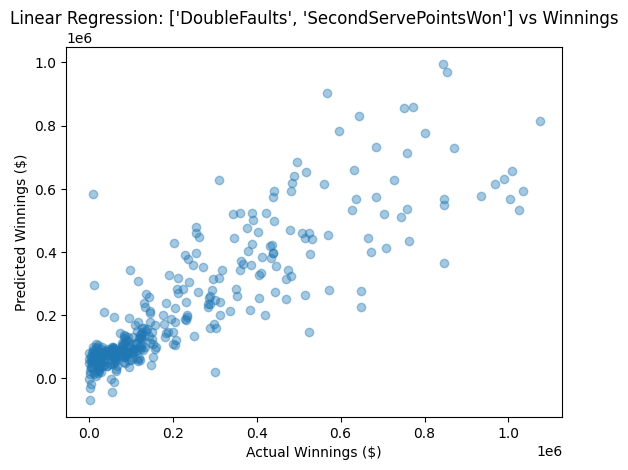

Model: ['BreakPointsConverted', 'ReturnGamesWon'] → Winnings
  Training R²: 0.0873
  Testing  R²: 0.0899



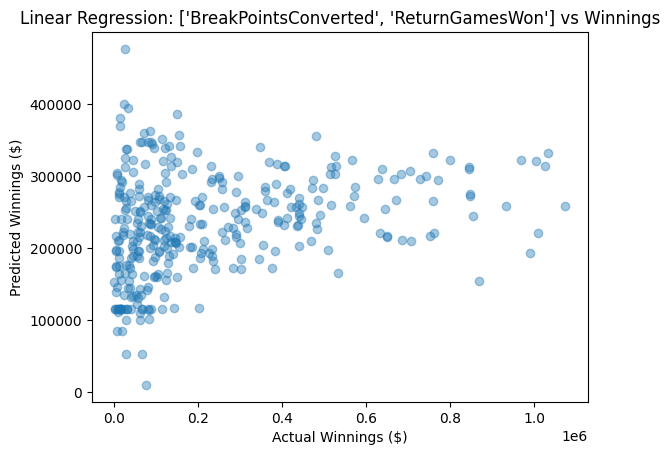

In [12]:
# Define three different 2-feature sets to predict yearly earnings (Winnings)
feature_sets = [
    (["Aces", "FirstServePointsWon"], "Winnings"),
    (["DoubleFaults", "SecondServePointsWon"], "Winnings"),
    (["BreakPointsConverted", "ReturnGamesWon"], "Winnings")
]

# Train and evaluate each model
for features, outcome in feature_sets:
    X = df[features]
    y = df[[outcome]]
    
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)
    
    # Fit linear regression model
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    # R² scores
    train_score = lr.score(X_train, y_train)
    test_score = lr.score(X_test, y_test)
    
    print(f"Model: {features} → {outcome}")
    print(f"  Training R²: {train_score:.4f}")
    print(f"  Testing  R²: {test_score:.4f}\n")
    
    # Plot predicted vs actual yearly earnings
    y_pred = lr.predict(X_test)
    plt.scatter(y_test, y_pred, alpha=0.4)
    plt.xlabel("Actual Winnings ($)")
    plt.ylabel("Predicted Winnings ($)")
    plt.title(f"Linear Regression: {features} vs {outcome}")
    plt.show()


Model: ['Aces', 'FirstServePointsWon', 'BreakPointsConverted', 'ReturnGamesWon'] → Winnings
  Training R²: 0.6751
  Testing  R²: 0.6403



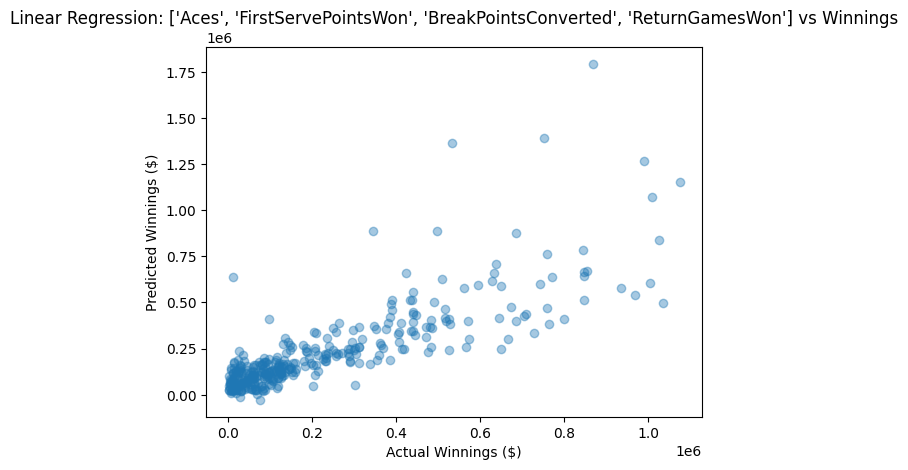

Model: ['DoubleFaults', 'SecondServePointsWon', 'FirstServeReturnPointsWon', 'TotalPointsWon'] → Winnings
  Training R²: 0.7371
  Testing  R²: 0.7505



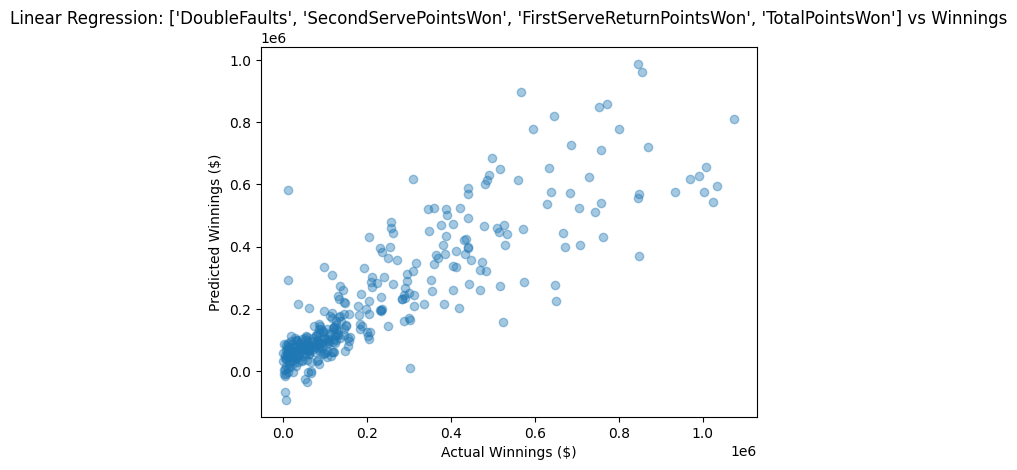

Model: ['ServiceGamesWon', 'TotalServicePointsWon', 'ReturnPointsWon', 'BreakPointsOpportunities'] → Winnings
  Training R²: 0.8218
  Testing  R²: 0.7980



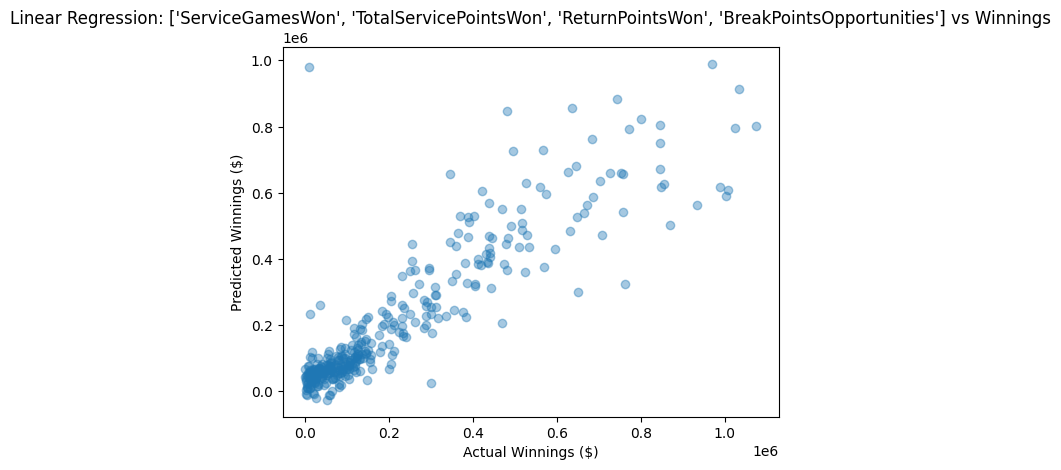

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv("data_folder/tennis_status.csv")

# Define three different multi-feature sets to predict yearly earnings (Winnings)
feature_sets = [
    (["Aces", "FirstServePointsWon", "BreakPointsConverted", "ReturnGamesWon"], "Winnings"),
    (["DoubleFaults", "SecondServePointsWon", "FirstServeReturnPointsWon", "TotalPointsWon"], "Winnings"),
    (["ServiceGamesWon", "TotalServicePointsWon", "ReturnPointsWon", "BreakPointsOpportunities"], "Winnings")
]

# Train and evaluate each model
for features, outcome in feature_sets:
    X = df[features]
    y = df[[outcome]]
    
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)
    
    # Fit linear regression model
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    # R² scores
    train_score = lr.score(X_train, y_train)
    test_score = lr.score(X_test, y_test)
    
    print(f"Model: {features} → {outcome}")
    print(f"  Training R²: {train_score:.4f}")
    print(f"  Testing  R²: {test_score:.4f}\n")
    
    # Plot predicted vs actual yearly earnings
    y_pred = lr.predict(X_test)
    plt.scatter(y_test, y_pred, alpha=0.4)
    plt.xlabel("Actual Winnings ($)")
    plt.ylabel("Predicted Winnings ($)")
    plt.title(f"Linear Regression: {features} vs {outcome}")
    plt.show()


# Conclusion: What Makes a Successful Tennis Player?

In this project, we applied **linear regression techniques** to explore the ATP men’s tennis dataset, focusing on the relationships between offensive and defensive statistics and player outcomes such as wins, losses, rankings, and yearly earnings. By systematically building models with single features, pairs of features, and multiple features, we were able to evaluate which aspects of a player’s game are most predictive of success.

Our findings showed that:

* **Single-feature models** offered only limited predictive power, as no single statistic could fully explain player performance or earnings.
* **Two-feature models** improved accuracy, revealing that combinations of service and return game skills were better predictors of yearly winnings than isolated measures.
* **Multi-feature models** performed the best, especially when combining metrics from both **offensive (e.g., aces, service games won)** and **defensive (e.g., break points converted, return games won)** categories. This highlights that elite players succeed not only by serving effectively but also by consistently applying pressure on their opponents’ serves.

Overall, the results confirm that **tennis success is multifaceted**. While powerful serves and minimizing double faults are critical offensive skills, the ability to **convert break points and win return games** is equally essential. The balance between offensive firepower and defensive resilience determines not only matches won but also career earnings.

From a broader perspective, this project demonstrates the usefulness of regression analysis in sports analytics. By quantifying the impact of specific skills on measurable outcomes, we gain deeper insight into what separates top performers from the rest—knowledge that can guide both coaching strategies and player development.

👉 In short: **being a successful tennis player requires excellence in both serving and returning, and the most consistent winners are those who dominate across multiple dimensions of the game.**

Would you like me to also **summarize the best-performing feature set** from our multi-feature models and phrase it in a way suitable for posting on the Codecademy forums?
